<a href="https://colab.research.google.com/github/Nicole-Wanjiru/SalesPredictionMachineLearningClassification/blob/main/MLClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Machine Learning
It deals with labelled data where the Outcome variable Y is prrsent in the Database. It is sometimes considered to be expensive and time consuming because the Dataset has to be labelled.

### Classification
It occurs when the labels are categorical in nature and can be used on several applications e.g
1. Healthcare: Used Disease Diagnosis, e.g Tumors,drug discovery.
2. Finance: Fraud Detection, Credit Scoring, Algorithmic Trading

### Regression
This occurs when the labels are continuous having the following applications
1. Finance: Stock Price Predictions, Risk Management, Economic Forecasting etc
2. Real Estate: Property Valuation, Rental Price Prediction.
3. Sales and Marketing: Sales Forecasting, Customer Lifetime Value (CLV)

In [26]:
#CLASSIFICATION
#SUPERVISED LEARNING
#DIABETES PREDICTION IN PATIENTS
#PIMA INDIANS DIABETES DATASET
#CONSTRAINTS:
#1. All patients are females
#2. All patients were above 21 years

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
#Statistical Analysis:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
#Checking for empties
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


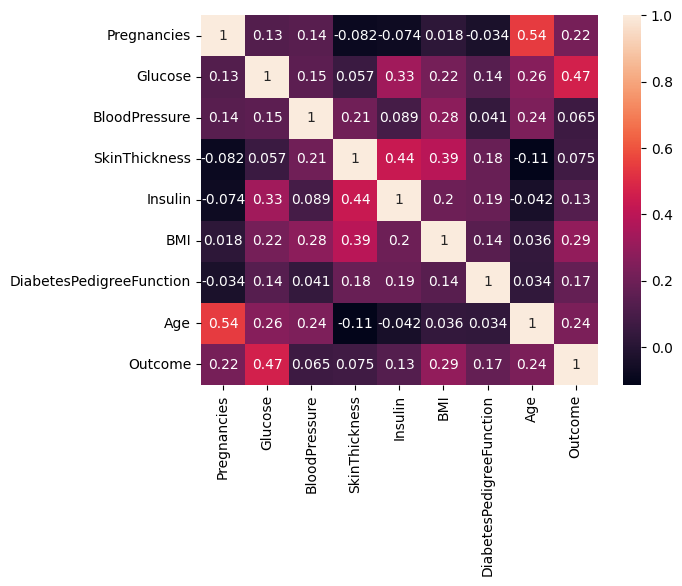

In [31]:
#Correlation Analysis (Done on numerical columns)
sns.heatmap(df.corr(), annot = True)
df.corr()

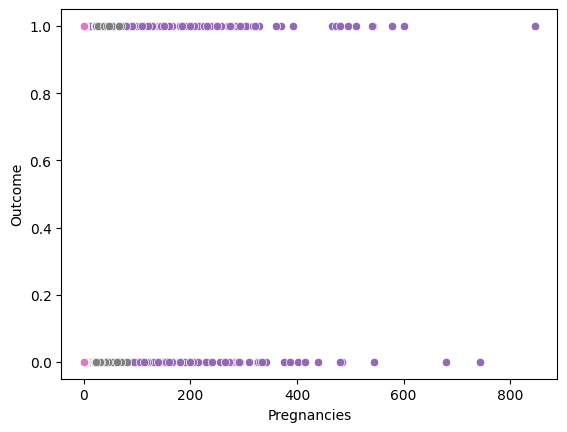

In [32]:
# Bi-Variant Analysis Between The Outcome And All The Predictor
#Scatter Plot

for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  sns.scatterplot(x=i, y= 'Outcome', data = df)
plt.show()


In [33]:
#Classification: Outcome Must be categorical(text)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [34]:
#Label Encoding
# 1: YES
# 0: NO

df['Outcome'] = df['Outcome'].replace({
    1: 'YES',
    0:'NO'
})

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [35]:
# PIE CHART DISTRIBUTION OF OUTCOME:
df.groupby('Outcome').size()

,0
Outcome,
NO,500
YES,268


<Axes: >

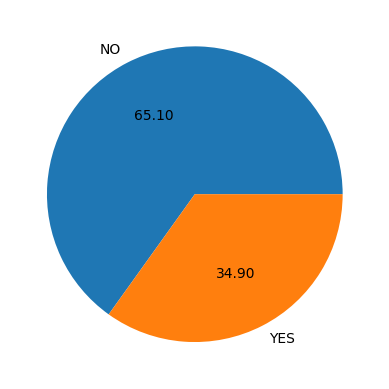

In [36]:
df.groupby('Outcome').size().plot(kind='pie', autopct='%.2f')

In [37]:
#MACHINE LEARNING:
#SL-CLASSIFICATION:
#1. STEP1: DIVIDE DATASET INTO X-FEATURES AND Y - OUTCOME
df.shape

(768, 9)

In [38]:
#. Convert to arrays:
array=df.values
X = array [:,0:8]
X.shape

(768, 8)

In [39]:
Y = array[:, 8]
Y.shape

(768,)

In [42]:
#STEP2: DIVIDE THE RECORDS INTO TRAINING AND TESTING SETS
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3, random_state=42)


In [43]:
#STEP2: DIVIDE THE RECORDS INTO TRAINING AND TESTING SETS
from sklearn import model_selection
X_train, X_test, Y_train, Y

(array([[1, 95, 60, ..., 23.9, 0.26, 22],
        [5, 105, 72, ..., 36.9, 0.159, 28],
        [0, 135, 68, ..., 42.3, 0.365, 24],
        ...,
        [10, 101, 86, ..., 45.6, 1.136, 38],
        [0, 141, 0, ..., 42.4, 0.205, 29],
        [0, 125, 96, ..., 22.5, 0.262, 21]], dtype=object),
 array([[6, 98, 58, ..., 34.0, 0.43, 43],
        [2, 112, 75, ..., 35.7, 0.148, 21],
        [2, 108, 64, ..., 30.8, 0.158, 21],
        ...,
        [0, 127, 80, ..., 36.3, 0.804, 23],
        [6, 105, 70, ..., 30.8, 0.122, 37],
        [5, 77, 82, ..., 35.8, 0.156, 35]], dtype=object),
 array(['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
        'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
        'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
        'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
        'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
        'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', '

In [44]:
X_test.shape

(231, 8)

In [45]:
#STEP3:SCIENTIFIC ALGORITHMS
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
#STEP 4: MODEL TRAINING
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [48]:
predictions = model.predict(X_test)
predictions

array(['YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 

In [51]:
#STEP 5: MODEL EVALUATION:
result = model.score(X_test, Y_test)
result

0.7186147186147186

In [53]:
#ACCURACY SCORE:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, Y_test)
result

0.7186147186147186

In [55]:
#PREDICTIONS
features = [[6, 148, 72,35, 0, 53, 0.06,65]]
outcome = model.predict(features)
print(f"69 Percent Likely to be {outcome}")

69 Percent Likely to be ['YES']


In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
